<a href="https://colab.research.google.com/github/WoozieFR/test2/blob/main/04_mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Under the Hood: Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

## Sidebar: Tenacity and Deep Learning

## End sidebar

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
#help(path)
#path.as_posix()

In [6]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [7]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/3'),Path('training/4'),Path('training/0'),Path('training/8'),Path('training/6'),Path('training/9'),Path('training/1'),Path('training/2'),Path('training/7')]

In [8]:
threes = (path/'training'/'3').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
threes

(#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/3/10011.png'),Path('training/3/10031.png'),Path('training/3/10034.png'),Path('training/3/10042.png'),Path('training/3/10052.png'),Path('training/3/1007.png'),Path('training/3/10074.png'),Path('training/3/10091.png')...]

In [9]:
images = [num.ls().sorted() for num in (path/'training').ls().sorted()]
images[9]


(#5949) [Path('training/9/10003.png'),Path('training/9/10004.png'),Path('training/9/10023.png'),Path('training/9/10028.png'),Path('training/9/10038.png'),Path('training/9/10043.png'),Path('training/9/10047.png'),Path('training/9/1005.png'),Path('training/9/10055.png'),Path('training/9/10059.png')...]

In [10]:
im3_path = images[3][2]
im3 = Image.open(im3_path)
im3

In [11]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  13,  36],
       [  0,   0,   0,   0,  89, 253],
       [  0,   0,   0,   0,  89, 253],
       [  0,   0,   0,   0,  17, 151]], dtype=uint8)

In [12]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  13,  36],
        [  0,   0,   0,   0,  89, 253],
        [  0,   0,   0,   0,  89, 253],
        [  0,   0,   0,   0,  17, 151]], dtype=torch.uint8)

In [13]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,18,93,164,254,255,254,254,254,151,0,0
2,0,0,0,0,13,36,151,253,253,253,253,253,253,218,239,213,10,0
3,0,0,0,0,89,253,253,253,245,172,82,82,82,2,148,253,150,0
4,0,0,0,0,89,253,252,171,54,0,0,0,0,37,177,253,188,0
5,0,0,0,0,17,151,51,0,0,0,0,0,40,229,253,253,147,0
6,0,0,0,0,0,0,0,0,0,0,83,206,237,253,253,211,8,0
7,0,0,0,0,0,0,0,70,143,243,251,253,253,253,181,50,0,0
8,0,0,0,0,0,0,4,204,253,253,253,253,253,253,106,0,0,0
9,0,0,0,0,0,0,5,235,253,253,221,167,94,250,125,0,0,0


## First Try: Pixel Similarity

In [14]:
#seven_tensors = [tensor(Image.open(o)) for o in sevens]
#three_tensors = [tensor(Image.open(o)) for o in threes]
#len(three_tensors),len(seven_tensors)

In [15]:
images_tensors = [[tensor(Image.open(o)) for o in num] for num in images]

In [16]:
len(images_tensors[0][1])

28

In [17]:
images_tensors[0][1].shape

torch.Size([28, 28])

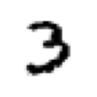

In [18]:
show_image(images_tensors[3][4]);

In [19]:
#stacked_sevens = torch.stack(seven_tensors).float()/255
#stacked_threes = torch.stack(three_tensors).float()/255
#stacked_threes.shape

In [20]:
stacked_images = [torch.stack(num).float()/255 for num in images_tensors]

In [21]:
len(stacked_images)

10

In [22]:
#len(stacked_threes.shape)

In [23]:
len(stacked_images[0].shape)

3

In [24]:
stacked_images[0].shape

torch.Size([5923, 28, 28])

In [25]:
#stacked_threes.ndim

In [26]:
stacked_images[0].ndim

3

In [27]:
#mean3 = stacked_threes.mean(0)
#show_image(mean3);

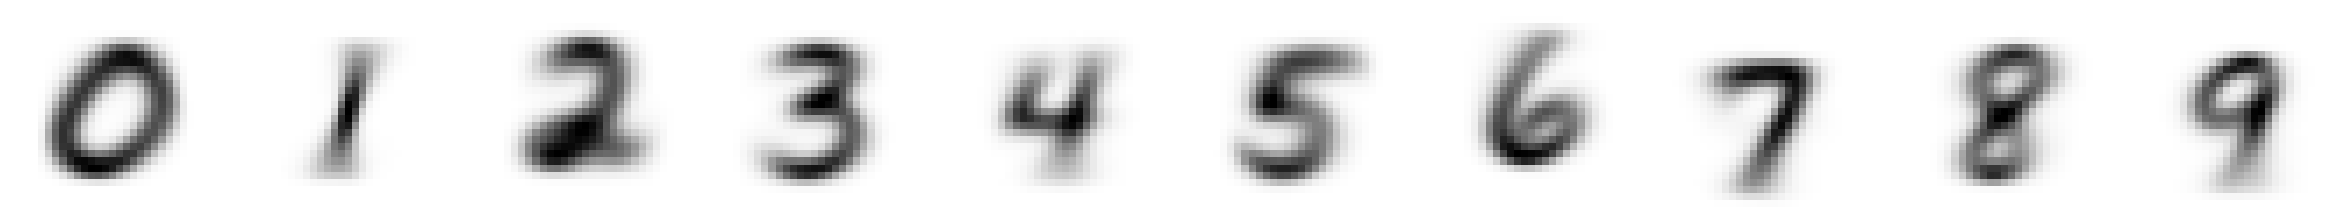

In [28]:
mean_images = [num.mean(0) for num in stacked_images]
#for i in range(len(mean_images)):
#    show_image(mean_images[i])

show_images(mean_images)

In [29]:
#doc(show_images)

In [30]:
#mean7 = stacked_sevens.mean(0)
#show_image(mean7);

In [31]:
#a_3 = stacked_threes[1]
#show_image(a_3);

In [32]:
a_3 = stacked_images[3][1]
a_5 = stacked_images[5][2]

<Axes: >

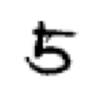

In [33]:
show_image(a_5)

In [34]:
#dist_3_abs = (a_3 - mean3).abs().mean()
#dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
#dist_3_abs,dist_3_sqr

In [35]:
dist_3_abs = (a_3 - mean_images[3]).abs().mean()
dist_3_sqr = ((a_3 - mean_images[3])**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [36]:
#dist_7_abs = (a_3 - mean7).abs().mean()
#dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
#dist_7_abs,dist_7_sqr

In [37]:
dist_7_abs = (a_3 - mean_images[7]).abs().mean()
dist_7_sqr = ((a_3 - mean_images[7])**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [38]:
#F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

In [39]:
F.l1_loss(a_3.float(),mean_images[7]), F.mse_loss(a_3,mean_images[7]).sqrt()

(tensor(0.1586), tensor(0.3021))

In [40]:
F.l1_loss(a_3.float(),mean_images[3]), F.mse_loss(a_3,mean_images[3]).sqrt()

(tensor(0.1114), tensor(0.2021))

### NumPy Arrays and PyTorch Tensors

In [41]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [42]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [44]:
tns[1]

tensor([4, 5, 6])

In [45]:
tns[:,1]

tensor([2, 5])

In [46]:
tns[1,1:3]

tensor([5, 6])

In [47]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [48]:
tns.type()

'torch.LongTensor'

In [49]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## Computing Metrics Using Broadcasting

In [50]:
#valid_3_tens = torch.stack([tensor(Image.open(o))
                            #for o in (path/'testing'/'3').ls()])
#valid_3_tens = valid_3_tens.float()/255
#valid_7_tens = torch.stack([tensor(Image.open(o))
                            #for o in (path/'testing'/'7').ls()])
#valid_7_tens = valid_7_tens.float()/255
#valid_3_tens.shape,valid_7_tens.shape

In [51]:
test = [num.ls().sorted() for num in (path/'testing').ls().sorted()]
test2 = [[tensor(Image.open(o)) for o in num] for num in test]
test3 = [torch.stack(num) for num in test2]
len(test3)

10

In [52]:
test3 = [torch.stack([tensor(Image.open(o)) for o in num.ls().sorted()]) for num in (path/'testing').ls().sorted()]

In [53]:
stacked_valid_images = [torch.stack([tensor(Image.open(o)) for o in num.ls().sorted()]) for num in (path/'testing').ls().sorted() ]

In [54]:
len(stacked_valid_images)

10

In [55]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
#def mnist_distance(a,b): return (a-b).abs().mean((0,1))
mnist_distance(a_3, mean_images[3])

tensor(0.1114)

In [56]:
#valid_3_dist = mnist_distance(valid_3_tens, mean3)
#valid_3_dist, valid_3_dist.shape

In [57]:
valid_dist = [mnist_distance(stacked_valid_images[i], mean_images[i]) for i in range(len(mean_images))]
valid_dist[3], valid_dist[3].shape

(tensor([25.6367, 44.4859, 41.5864,  ..., 27.7280, 41.1506, 43.8371]),
 torch.Size([1010]))

In [58]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [59]:
#(valid_3_tens-mean3).shape

In [60]:
(stacked_valid_images[3]-mean_images[3]).shape

torch.Size([1010, 28, 28])

In [61]:
#def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [62]:
stacked_mean_images = torch.stack([num for num in mean_images])

In [63]:
stacked_mean_images.shape

torch.Size([10, 28, 28])

In [64]:
mnist_distance(a_3, stacked_mean_images)

tensor([0.1879, 0.1353, 0.1734, 0.1114, 0.1704, 0.1443, 0.1723, 0.1586, 0.1550, 0.1601])

In [65]:
def pred_digit(x): return mnist_distance(x, stacked_mean_images).argmin().item()

In [66]:
#is_3(a_3), is_3(a_3).float()

In [67]:
pred_digit(a_3)

3

<Axes: title={'center': '3'}>

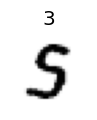

In [68]:
a_5 = stacked_images[5][18]

show_image(a_5,title=pred_digit(a_5))

In [69]:
a_3.shape

torch.Size([28, 28])

In [70]:
stacked_mean_images.shape

torch.Size([10, 28, 28])

In [71]:
#is_3(valid_3_tens)

In [72]:
stacked_mean_images[0].shape

torch.Size([28, 28])

In [73]:
#zeroes_res = [pred_digit(images) for images in stacked_valid_images[0]]
valid_res = [torch.stack([tensor(pred_digit(images)) for images in num]) for num in stacked_valid_images]
len(valid_res[0])
valid_res[0].shape

torch.Size([980])

In [74]:
zeroes_res = torch.stack([tensor(pred_digit(images)) for images in stacked_valid_images[0]])
zeroes_res.shape

torch.Size([980])

In [75]:
#accuracy_3s =      is_3(valid_3_tens).float() .mean()
#accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

#accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

In [76]:
accuracy_zeroes = (valid_res[0] == 0).float().mean()
accuracy_zeroes

tensor(0.9133)

In [77]:
accuracy = [(res == i).float().mean() for i, res in enumerate(valid_res)]
tensor(accuracy).mean()

tensor(0.7163)

In [78]:
accuracy

[tensor(0.9133),
 tensor(0.9965),
 tensor(0.5145),
 tensor(0.7406),
 tensor(0.6538),
 tensor(0.2276),
 tensor(0.8486),
 tensor(0.7821),
 tensor(0.6530),
 tensor(0.8335)]

## Stochastic Gradient Descent (SGD)

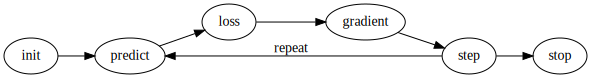

In [79]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [80]:
def f(x): return x**2

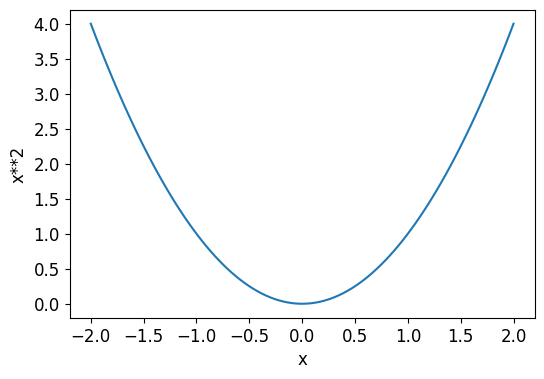

In [81]:
plot_function(f, 'x', 'x**2')

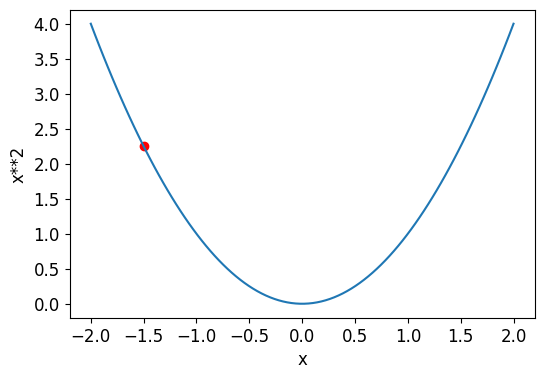

In [82]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

### Calculating Gradients

In [83]:
xt = tensor(3.).requires_grad_()

In [84]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [85]:
yt.backward()

In [86]:
xt.grad

tensor(6.)

In [87]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [88]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [89]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

### Stepping With a Learning Rate

### An End-to-End SGD Example

In [90]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

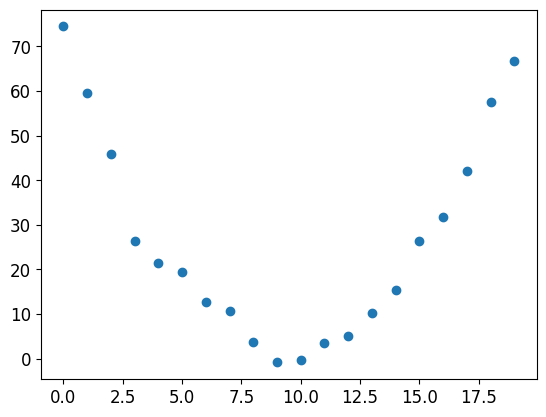

In [91]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [92]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [93]:
def mse(preds, targets): return ((preds-targets)**2).mean()

#### Step 1: Initialize the parameters

In [94]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [95]:
#hide
orig_params = params.clone()

#### Step 2: Calculate the predictions

In [96]:
preds = f(time, params)

In [97]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [98]:
doc(to_np)

to_np(x)
Convert a tensor to a numpy array.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


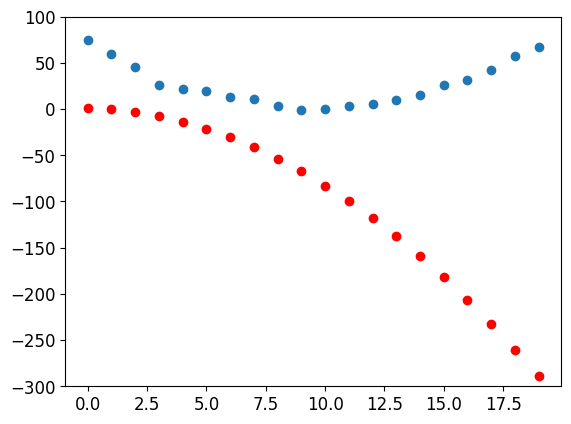

In [99]:
show_preds(preds)

#### Step 3: Calculate the loss

In [100]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

In [101]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [102]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [103]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

#### Step 5: Step the weights.

In [104]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [105]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

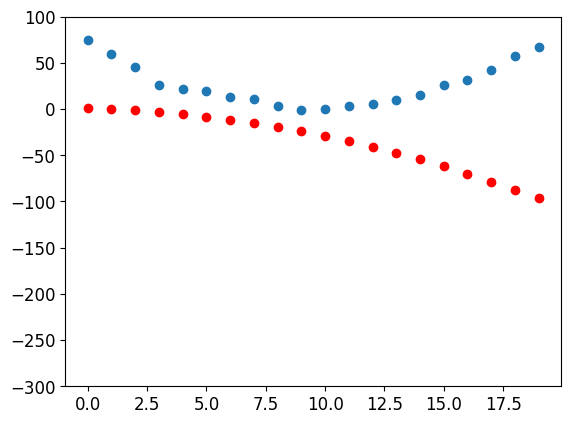

In [106]:
show_preds(preds)

In [107]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### Step 6: Repeat the process

In [108]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [109]:
#hide
params = orig_params.detach().requires_grad_()

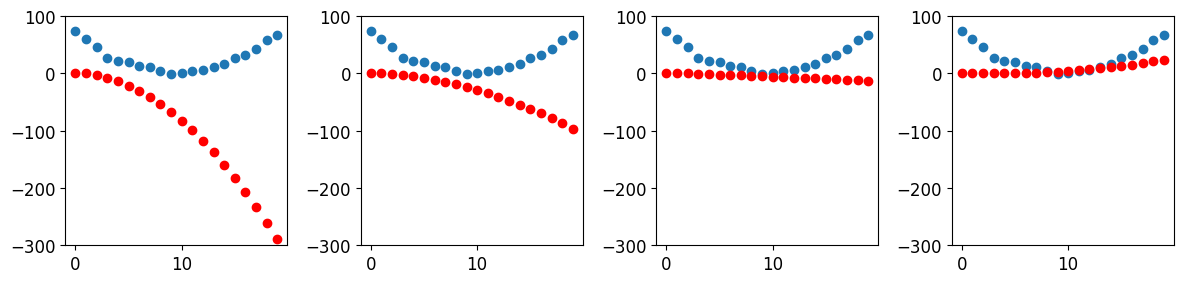

In [110]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

#### Step 7: stop

### Summarizing Gradient Descent

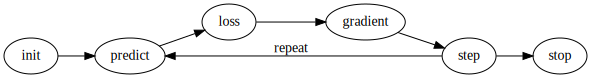

In [111]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## The MNIST Loss Function

In [112]:
#train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [113]:
#3].shape

In [114]:
train_x = torch.cat(stacked_images).view(-1, 28*28)

In [115]:
train_x.shape

torch.Size([60000, 784])

In [116]:
#train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
#train_x.shape,train_y.shape

In [117]:
train_y = torch.cat([tensor([idx]*len(num)) for idx, num in enumerate(stacked_images)]).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [118]:
dset = list(zip(train_x,train_y))
x,y = dset[59000]
x.shape,y

(torch.Size([784]), tensor([9]))

<Axes: title={'center': 'tensor([9])'}>

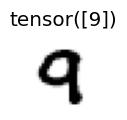

In [119]:
show_image(x.view(28, 28), title=y)

In [120]:
valid_x = torch.cat(stacked_valid_images).view(-1, 28*28)
valid_y = torch.cat([tensor([idx]*len(num)) for idx, num in enumerate(stacked_valid_images)]).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))
valid_x, valid_y = dset[0]
valid_x.shape, valid_y

(torch.Size([784]), tensor([0]))

In [121]:
#valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
#valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
#valid_dset = list(zip(valid_x,valid_y))

In [122]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [123]:
weights = init_params((28*28, 10),1)
weights.shape

torch.Size([784, 10])

In [124]:
bias = init_params(10, 1)
bias

tensor([ 0.6863, -0.1078,  0.3850, -0.9214,  2.6685,  0.5705,  1.7508,  1.2681, -1.4726, -2.5230], requires_grad=True)

In [125]:
(train_x[0]*weights.T).sum() + bias

tensor([-1.8335, -2.6277, -2.1349, -3.4412,  0.1486, -1.9494, -0.7691, -1.2518, -3.9925, -5.0429], grad_fn=<AddBackward0>)

In [126]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds.shape

torch.Size([60000, 10])

In [127]:
preds[0:20,:].shape

torch.Size([20, 10])

In [128]:
preds[0:20].argmax(1).shape

torch.Size([20])

In [129]:
#train_y[40000]

In [130]:
preds.argmax(1).unsqueeze(1).shape

torch.Size([60000, 1])

In [131]:
train_y.shape

torch.Size([60000, 1])

In [132]:
test = preds[0:10].argmax(1).float() == train_y[0:10].T
test

tensor([[False, False, False, False, False, False, False, False, False, False]])

In [133]:
corrects = preds.argmax(1).unsqueeze(1).float() == train_y
corrects.shape

torch.Size([60000, 1])

In [134]:
#preds[0].float() == train_y[0]

In [135]:
#corrects = (preds[0:30000].float() == train_y[0:30000,0])
#corrects

In [136]:
corrects.float().mean().item()

0.09803333133459091

In [137]:
with torch.no_grad(): weights[0] *= 1.0001

In [138]:
corrects = preds.argmax(1).unsqueeze(1).float() == train_y
corrects.shape
corrects.float().mean().item()

0.09803333133459091

In [139]:
#preds = linear1(train_x)
#((preds>0.0).float() == train_y).float().mean().item()

In [140]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [141]:
preds[0], train_y[0]

(tensor([-8.3942, -2.4164, -8.0167,  6.5187, -6.5703, 14.9420, -6.9692, 15.7885, -6.4757,  1.3778], grad_fn=<SelectBackward0>),
 tensor([0]))

In [149]:
train_y_one_hot = torch.zeros(len(train_y), 10)
train_y_one_hot.shape
for i, labels in enumerate(train_y):
    train_y_one_hot[i, labels] = 1
train_y_one_hot[:4]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#def mnist_loss(predictions, targets):
#    return torch.where(targets==1, 1-predictions, predictions).mean()

In [150]:
#torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
#mnist_loss(prds,trgts)

tensor(0.4333)

In [ ]:
#mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

### Sigmoid

In [151]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
#def mnist_loss(predictions, targets):
  #  predictions = predictions.sigmoid()
   # return torch.where(targets==1, 1-predictions, predictions).mean()

In [157]:

preds = preds.sigmoid()
test_loss = (train_y_one_hot - preds).abs()
test_loss.mean(0)

tensor([0.6275, 0.6232, 0.6272, 0.6264, 0.6280, 0.6304, 0.6274, 0.6258, 0.6280, 0.6274], grad_fn=<MeanBackward1>)

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### SGD and Mini-Batches

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

## Putting It All Together

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

In [ ]:
preds = linear1(batch)
preds

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

### Creating an Optimizer

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

## Adding a Nonlinearity

In [ ]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [ ]:
plot_function(F.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

### Going Deeper

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

## Jargon Recap

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.